In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
raw_data = datasets.load_wine()

In [4]:
raw_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
print(raw_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [6]:
print('data.shape\t',raw_data['data'].shape,
      '\ntarget.shape \t',raw_data['target'].shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


In [7]:
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']

In [8]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


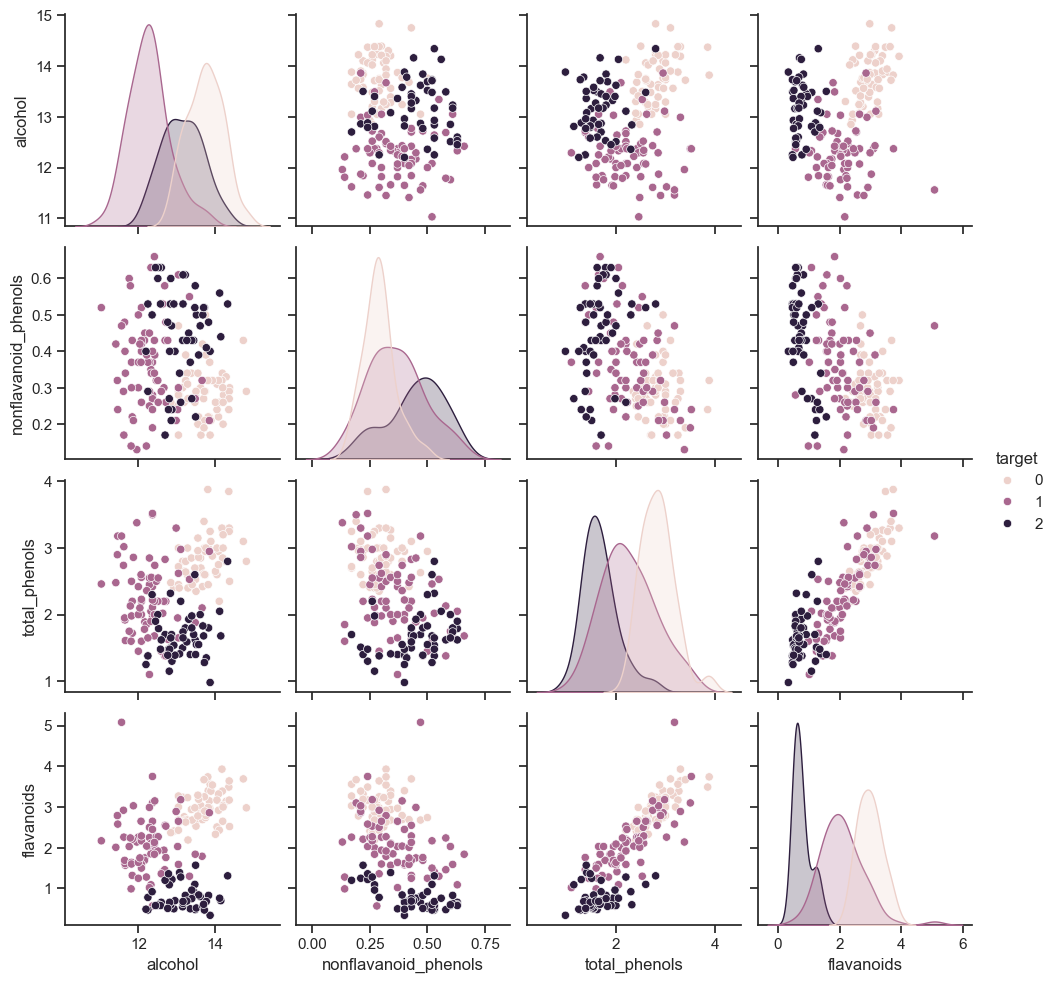

In [12]:
sns.pairplot(features, hue='target', diag_kind='kde', 
             vars=['alcohol', 'nonflavanoid_phenols', 'total_phenols', 'flavanoids'])

# Show the plot
plt.show()

a1. 
Class 0 : positive correlation between alcohol and nonflavanoid_phenols
Class 1 : negative correlation between alcohol and nonflavanoid_phenols
Class 2 : positive correlation between alcohol and nonflavanoid_phenols

a2. 
Class 0 : positive relation between total_phenols and flavanoids
Class 1 : positive relation between total_phenols and flavanoids
Class 2 : positive relation between total_phenols and flavanoids




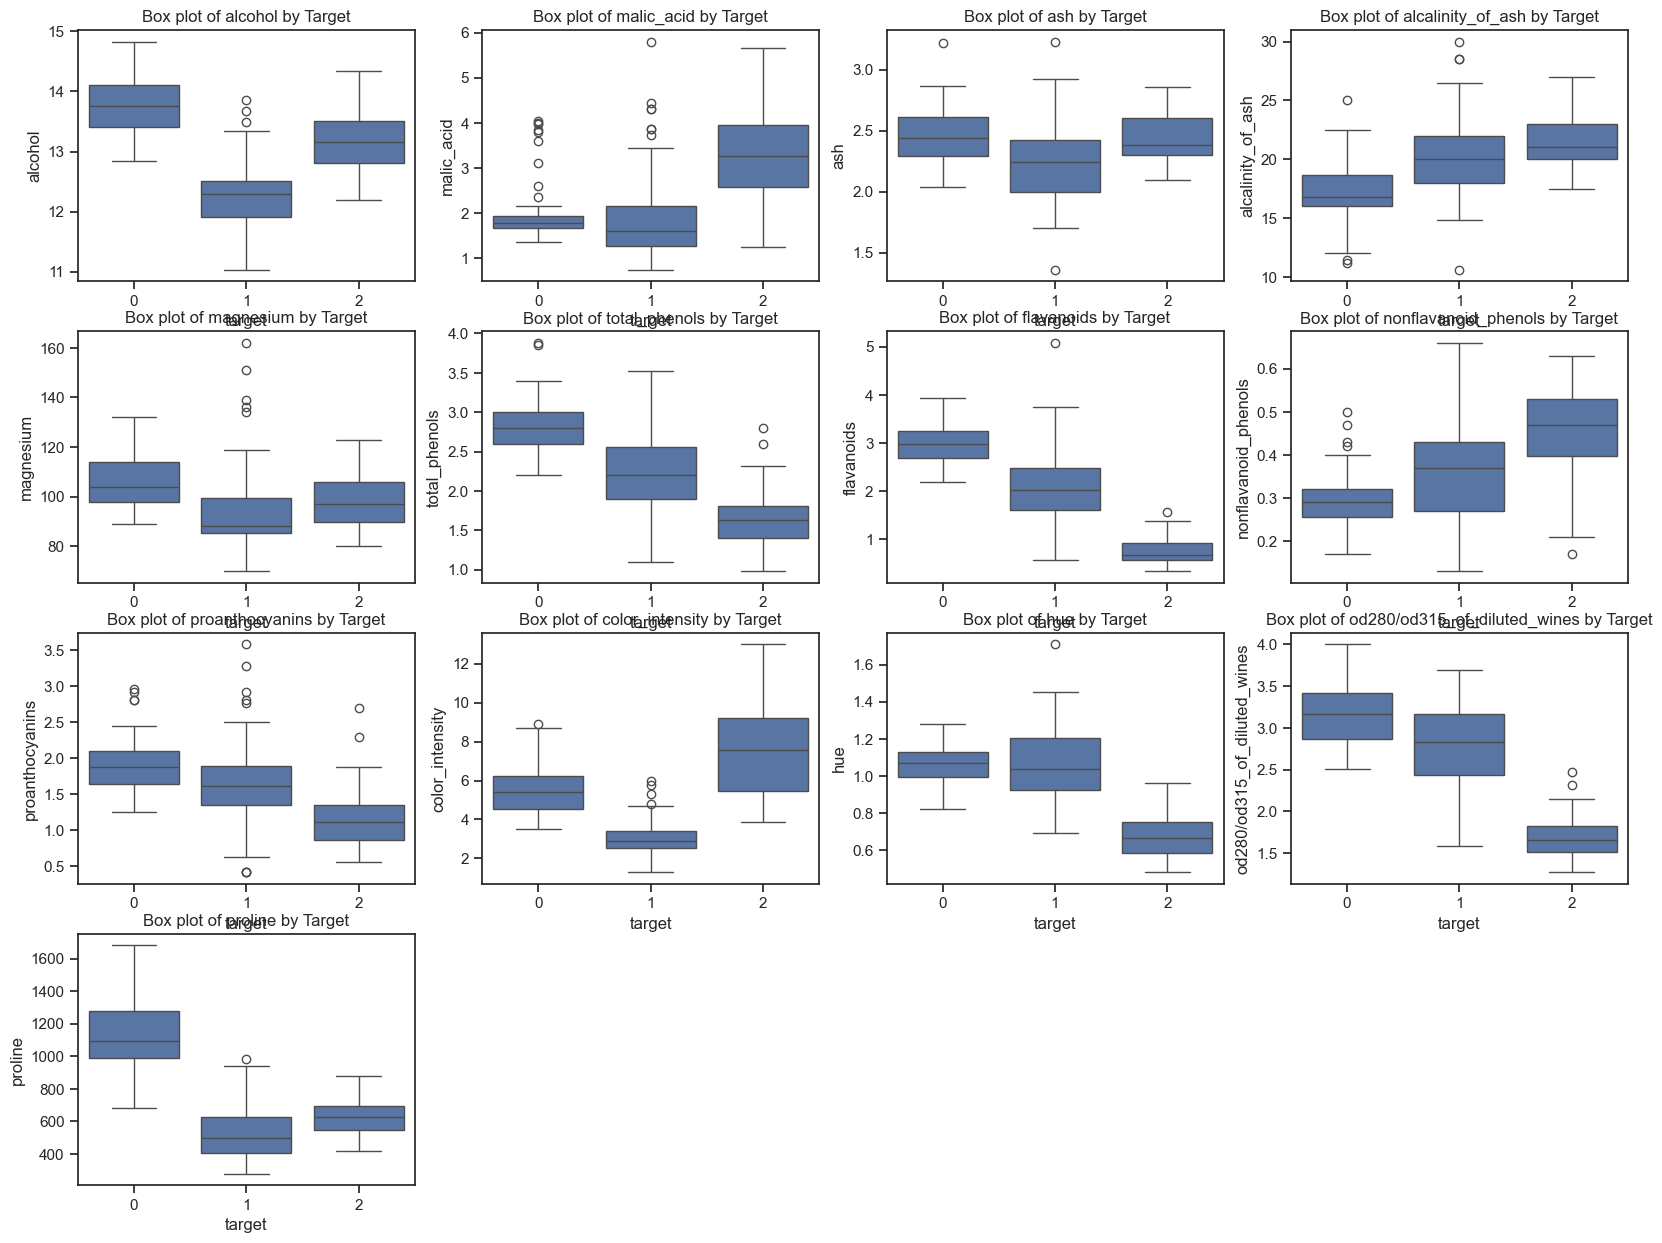

In [13]:
columns = raw_data['feature_names']
plt.figure(figsize=(20, 15))

for i, column in enumerate(columns):
    plt.subplot(4, 4, i + 1)  # Arrange in a grid of 4x4 (adjust based on 13 columns)
    sns.boxplot(x='target', y=column, data=data)
    plt.title(f'Box plot of {column} by Target')

b1.
Proline: Class 0 has substantially higher values than the other two classes
Color Intensity: Class 2 has much higher values compared to classes 0 and 1.
Malic Acid: Class 2 has noticeably higher values compared to class 0 and class 1.
Flavanoids: There is a distinct separation, with class 0 having higher values and class 2 having significantly lower values.

b2. Variance Ratio (F-statistic): This measures the ratio of the variance between the group means to the variance within each group. A higher F-statistic suggests more significant differences across groups.
F = Variance between classes / Variance within classes


# Number 2


In [53]:
from sklearn.linear_model import LinearRegression

# Load data
url = "https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt"
data = pd.read_csv(url, header=None, names=['size', 'beds', 'price'])



Intercept (Theta 0): 0.0
Coefficients (Theta 1 and Theta 2): [  140.86108621 16978.19105903]
Price is: 335642.55588036904


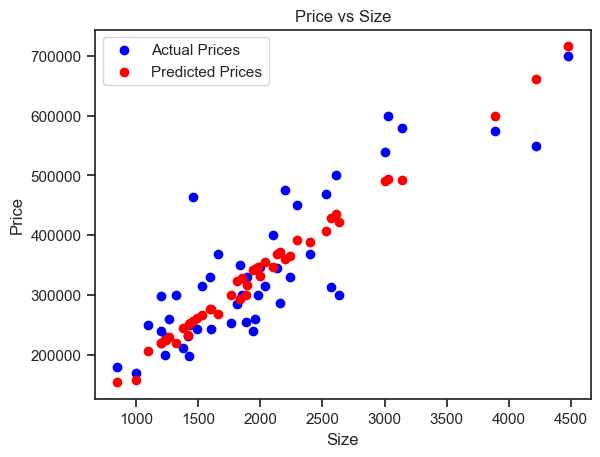

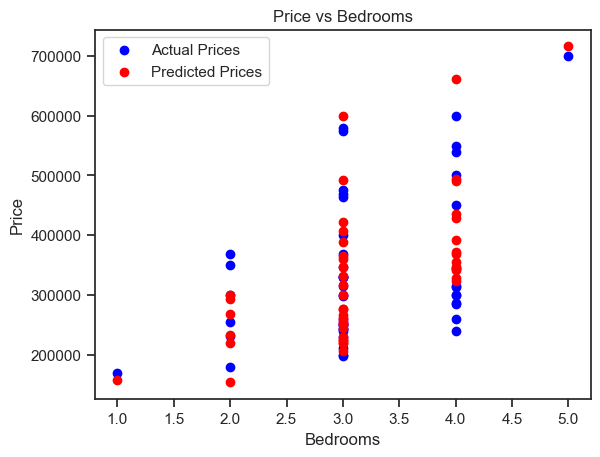

In [54]:


# Select features and target variable
x = data[['size', 'beds']].head(47)
y = data['price'].head(47)  # Matching only the first 47 samples

# Create and train the model with fit_intercept=False
model = LinearRegression(fit_intercept=False)
model.fit(x, y)

# Predict the prices
y_pred = model.predict(x)

# Calculate the average predicted price
average_price = np.mean(y_pred)

# Print the model parameters
print("Intercept (Theta 0):", model.intercept_)  # This should print 0 due to fit_intercept=False
print("Coefficients (Theta 1 and Theta 2):", model.coef_)
print("Price is:", average_price)

# Plotting Actual vs Predicted Prices based on Size
plt.scatter(data['size'].head(47), y, color='blue', label='Actual Prices')
plt.scatter(data['size'].head(47), y_pred, color='red', label='Predicted Prices')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs Size')
plt.show()

# Plotting Actual vs Predicted Prices based on Bedrooms
plt.scatter(data['beds'].head(47), y, color='blue', label='Actual Prices')
plt.scatter(data['beds'].head(47), y_pred, color='red', label='Predicted Prices')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs Bedrooms')
plt.show()



Intercept (Theta 0): 89597.90954279754
Coefficients (Theta 1 and Theta 2): [  139.21067402 -8738.01911233]
Predicted price for [2980 sqft, 3 beds]: 478231.66077833803


c:\Users\bbaral3\scoop\apps\python312\current\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


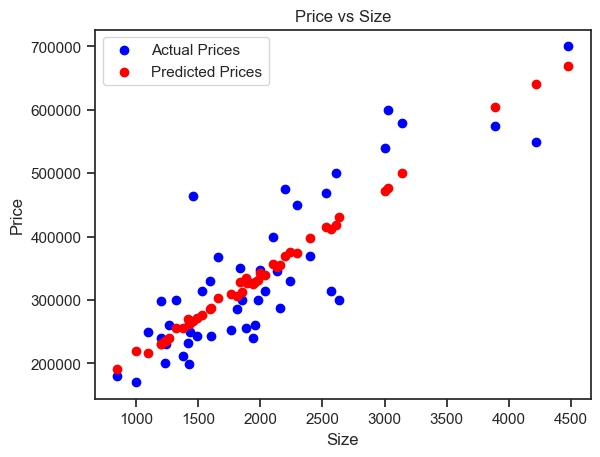

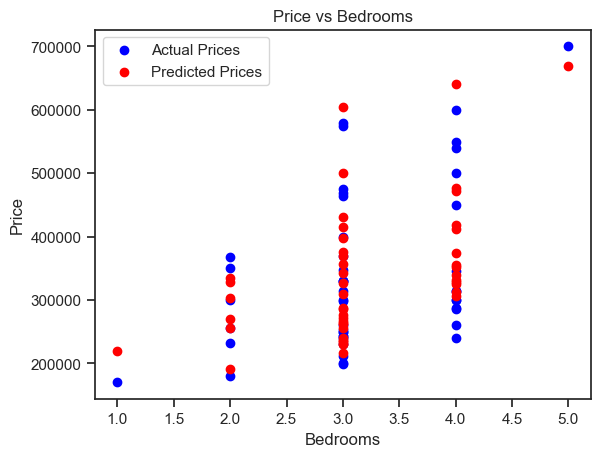

In [55]:

# Select features and target variable
x = data[['size', 'beds']].head(47)
y = data['price'].head(47)

# Create and train the model with fit_intercept=True
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Predict the prices
y_pred = model.predict(x)

# Calculate the average predicted price
average_price = np.mean(y_pred)

# Print the model parameters
print("Intercept (Theta 0):", model.intercept_)
print("Coefficients (Theta 1 and Theta 2):", model.coef_)

# Predict the price for the house [2980 sqft, 3 beds]
prediction = model.predict([[2980, 3]])
print("Predicted price for [2980 sqft, 3 beds]:", prediction[0])

# Plotting Actual vs Predicted Prices based on Size
plt.scatter(data['size'], y, color='blue', label='Actual Prices')
plt.scatter(data['size'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs Size')
plt.show()

# Plotting Actual vs Predicted Prices based on Bedrooms
plt.scatter(data['beds'], y, color='blue', label='Actual Prices')
plt.scatter(data['beds'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs Bedrooms')
plt.show()


In [56]:

from sklearn.metrics import mean_squared_error, r2_score

# Load data
url = "https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt"
data = pd.read_csv(url, header=None, names=['size', 'beds', 'price'])

# Select features and target variable
x = data[['size', 'beds']].head(47)
y = data['price'].head(47)

# Model 1: Linear regression with fit_intercept=False
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(x, y)
y_pred_no_intercept = model_no_intercept.predict(x)

# Model 2: Linear regression with fit_intercept=True
model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(x, y)
y_pred_with_intercept = model_with_intercept.predict(x)

# Calculate MSE and R² for both models
mse_no_intercept = mean_squared_error(y, y_pred_no_intercept)
r2_no_intercept = r2_score(y, y_pred_no_intercept)

mse_with_intercept = mean_squared_error(y, y_pred_with_intercept)
r2_with_intercept = r2_score(y, y_pred_with_intercept)

# Print performance metrics
print("Model without Intercept:")
print("MSE:", mse_no_intercept)
print("R²:", r2_no_intercept)

print("\nModel with Intercept:")
print("MSE:", mse_with_intercept)
print("R²:", r2_with_intercept)


Model without Intercept:
MSE: 4513951420.499288
R²: 0.705015175265832

Model with Intercept:
MSE: 4086560101.205658
R²: 0.7329450180289141
